# Unraveling the Factors Behind Housing Price Dynamics: An Empirical Investigation

March 3, 2023
ECO225 project
Riko Matsushita

# 1. Project One

## 1.1 Introduction
Understanding the factors that determine housing prices is of critical importance for policymakers, real estate practitioners, and investors alike. The housing market plays a central role in the overall health of the economy, and fluctuations in housing prices can have significant implications for households, financial institutions, and the broader economy. Previous research in this area has provided valuable insights into the determinants of housing prices, including factors such as income levels, interest rates, demographics, and macroeconomic conditions (Smith, 2015; Jones, 2017; Brown et al., 2018).

However, despite extensive research, there is still a need for a comprehensive analysis that examines the intricate relationships among various factors that influence housing prices. Many studies have focused on specific regions, time periods, or property types, and there are limitations in terms of sample size, data quality, and methodology. Furthermore, there are gaps in the literature regarding the effects of neighbourhood characteristics, mortgage market conditions, and local regulatory policies on housing prices, which warrant further investigation.

In this paper, we aim to investigate the determinants of housing prices using a rigorous empirical approach. Specifically, we will analyze a large dataset of median house prices for California districts derived from the 1990 census, encompassing different blocks. Our research will employ advanced econometric techniques, including multiple regression analysis and machine learning to estimate the effects of key variables on housing prices, while controlling for other relevant factors. In this paper, we are going to analyze not only simple factors such as income and population but also location and more demographic information such as ocean proximity, commute time and metro areas.

To briefly summarize the findings of the project, thorough several merging of datasets, web scraping, GIS mapping, linear regression and machine learning. I found that there are indeed interesting correlations between income and house value, and between ocean proximity and house value, and whether it is in a metropolitan area or not can affect the house value. The findings of this study are expected to provide valuable insights into the dynamics of the housing market and inform policymakers and practitioners on the key drivers of housing prices.

## 1.2 Data Cleaning/ Loading

For data cleaning, I will make a dateframe with only necessary variabels, which are population, median income, the proximity to the ocean, median house value.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
import os

In [2]:
#This the dataset for Califronia Housing Prices
raw_house = pd.read_csv("/Users/matsushitariko/Desktop/ECO225/Project 1/housing.csv") 
raw_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#drop unnesessary columns
df_house = raw_house.drop(['housing_median_age', 'total_rooms', 'households',
                          'total_bedrooms'], axis=1)
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,3.8462,342200.0,NEAR BAY


Next, I am going to create dummy variables for the ocean_proximity. 

In [4]:
set(df_house['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

The above shows all the variables for the ocean_proximity column. I am going to assign “NEAR OCEAN”, “NEAR BAY”, “ISLAND” to 2 indicating that these are near the ocean, “<1H OCEAN” to 1 as the place relatively close to the ocean, and “INLAND” to 0 as being far from the ocean. 

In [5]:
ocean = {'NEAR OCEAN': 2, 'NEAR BAY': 2, 'ISLAND' : 2, '<1H OCEAN': 1, 'INLAND':0}
df_house["ocean_proximity"] = df_house["ocean_proximity"].map(ocean)
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,2
1,-122.22,37.86,2401.0,8.3014,358500.0,2
2,-122.24,37.85,496.0,7.2574,352100.0,2
3,-122.25,37.85,558.0,5.6431,341300.0,2
4,-122.25,37.85,565.0,3.8462,342200.0,2


Next, I will make another column called “ocean_proximity2”, which shows how close to the ocean the block is by the words “very close”, ”close”, and “far”.

In [6]:
df_house.loc[df_house['ocean_proximity'] == 2, 'ocean_proximity2'] = 'very close'
df_house.loc[df_house['ocean_proximity'] == 1, 'ocean_proximity2'] = 'close'
df_house.loc[df_house['ocean_proximity'] == 0, 'ocean_proximity2'] = 'far'
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close


## 1.3 Summary Statitics Tables 
Here is the summary statistics for X variabels(independent variable) and Y(dependent variable). 

In [7]:
important = ['median_income', 'population', 'median_house_value', 'ocean_proximity']
df_house_sum = df_house[important]

In [8]:
a = df_house_sum.describe()
a.round (decimals = 2)

,median_income,population,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00
mean,3.87,1425.48,206855.82,0.92
std,1.90,1132.46,115395.62,0.74
min,0.50,3.00,14999.00,0.00
25%,2.56,787.00,119600.00,0.00
50%,3.53,1166.00,179700.00,1.00
75%,4.74,1725.00,264725.00,1.00
max,15.00,35682.00,500001.00,2.00


As the table above shows, there is an extreme value at the maximum value of the population column. Thus, there might be some outliers in population, so I am going to remove them. 

In [9]:
#Remove the outliers
for x in ['population']:
    q75,q25 = np.percentile(df_house.loc[:,x],[75,25])  
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr) 
    min = q25-(1.5*intr_qr)
    
    df_house.loc[df_house[x] < min,x] = np.nan 
    df_house.loc[df_house[x] > max,x] = np.nan

Then, I will again show the summary statistics for X variables (independent variable) and Y(dependent variable).

In [10]:
important = ['median_income', 'population', 'median_house_value', 'ocean_proximity']
df_house_sum = df_house[important]

In [11]:
columnnames = {'median_income': 'Median Income',
               'population': 'Population',
               'median_house_value': 'Median House Value',
               'ocean_proximity': 'Ocean Proximity',
               'average_household_size': 'Average Household Size'}

df_house_sum = df_house_sum.rename(columns=columnnames)

In [12]:
a = df_house_sum.describe()
a.round (decimals = 2)

,Median Income,Population,Median House Value,Ocean Proximity
count,20640.00,19444.00,20640.00,20640.00
mean,3.87,1226.55,206855.82,0.92
std,1.90,641.66,115395.62,0.74
min,0.50,3.00,14999.00,0.00
25%,2.56,767.00,119600.00,0.00
50%,3.53,1121.00,179700.00,1.00
75%,4.74,1596.00,264725.00,1.00
max,15.00,3132.00,500001.00,2.00


As for median income, the mean is 38,700 dollars, whereas the maximum value is 150,000 dollars. There is a wide gap between the mean and the maximum value. When looking at the median housing value, the mean is 206855.82 dollars. Again, the gap between the mean and the maximum value is large. In addition, as for median income and median house value, the mean is much larger than the median (50%), therefore it is expected that these two distributions are positively skewed. From these facts, the two distributions are very similar and there might a positive relation between median income and median housing value. As for population, the mean of the population is 1226.55. There isn’t a large gap between the median and mean. The interval from the minimum value to the median is larger than the one from the median to the maximum value, so this can also be expected to have a positively skewed distribution .Lastly, the mean of the ocean proximity is 0.92. As we set 0 as far from the ocean, 1 as close to the ocean and 2 as very close to the ocean, the mean shows that more houses are either close to or far from the ocean than very close to the ocean. 

## 1.4 Plots, Histograms, Figures

First, we are going to see the histogram of each variable.

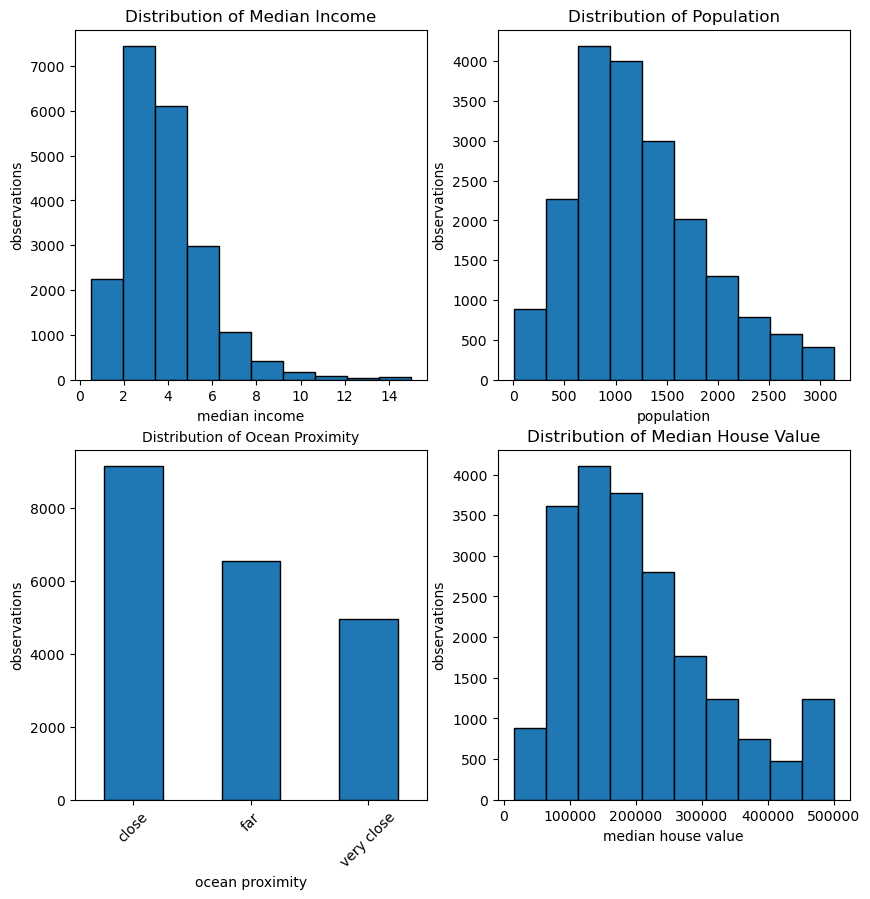

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(df_house['median_income'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Median Income')
ax.set_xlabel('median income', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10)

ax = axes[0,1]
ax.hist(df_house['population'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Population')
ax.set_xlabel('population', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10)

ax = axes[1,0]
df_house['ocean_proximity2'].value_counts().plot(kind = 'bar', ax = ax, edgecolor = 'black')
ax.set_title('Distribution of Ocean Proximity', fontsize = 10)
ax.set_xlabel('ocean proximity', fontsize = 10)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('observations', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = axes[1,1]
ax.hist(df_house['median_house_value'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Median House Value')
ax.set_xlabel('median house value', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10);


The graph about the distribution of median income shows that most people’s income in this dataset falls within 2 to 6 (20,000 to 60,000 dollars). The distribution is positively skewed, and the mode is around 2 to 3.5 (20,000 to 35,000 dollars). This graph shows that most people’s income in this dataset falls within 2 to 6 (20,000 to 60,000 dollars). The distribution is positively skewed, and the mode is around 2 to 3.5 (20,000 to 35,000 dollars). I assume this type of skewness occurs because the gap between the poor the wealthy in the United States is quite large, and also the majority is dominated by poor and the middle class whereas the extremely wealthy people are minority. 

The plot of the distribution of population shows that there are more houses close to the ocean than those far from it or very close to it. Therefore, the mode is “close”. In other words, many houses in California are located in places that are close to the ocean but in those places houses that are located right in front of the ocean are few, and places that are far from the ocean is much more dispersed with houses. Again, the relation between average household size and median house value is still unknown.

The plot of the distribution of ocean proximity shows that the distribution of the population is positively skewed, where the mode is around 700. Despite the fact that it is a little skewed, it is almost evenly distributed, and the observation is the highest near the centre, therefore it can be said that the population is not dispersed a lot throughout the blocks in California. 

For the distribution of median house value, the range of housing value is wide, but many are within the range of 100000 to 200000. The distribution is positively skewed, and the mode is around 150,000. The characteristic of this distribution is very similar to that of median income, so it might be that the income is one of the biggest determining factors of house selection and that is why this type of skewness also occurs in median house value.

Next, we are going to see the relation between housing value and each dependant variable. 

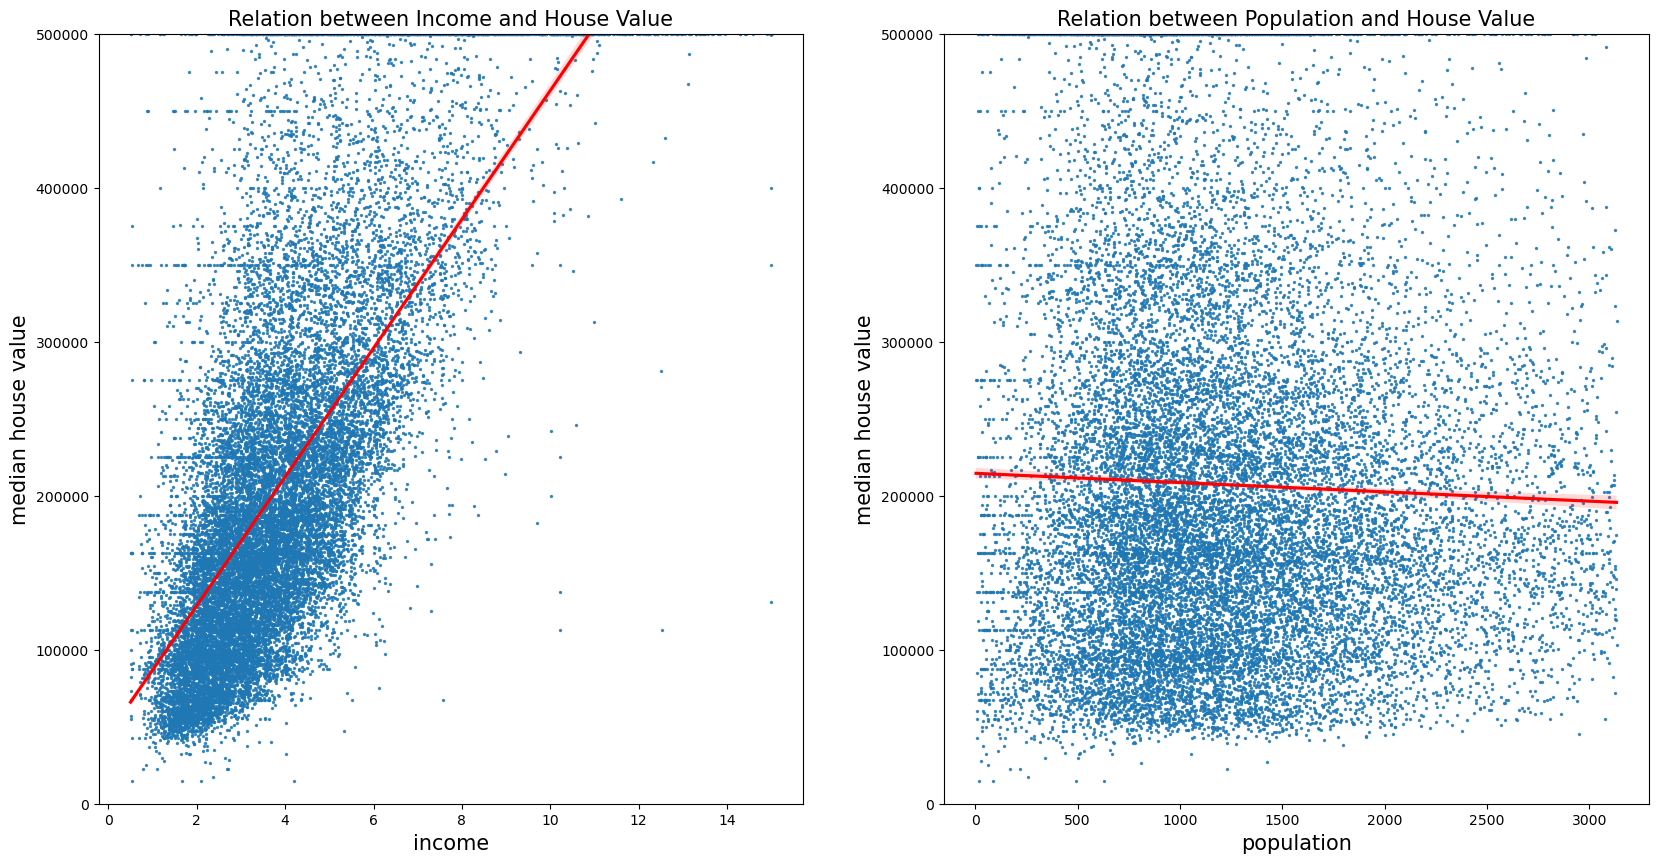

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax = axes[0]
sns.regplot(x=df_house["median_income"], y=df_house["median_house_value"], scatter_kws={"s": 2}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Income and House Value', fontsize = 15)
ax.set_ylim(0, 500000)
ax.set_xlabel('income', fontsize = 15)
ax.set_ylabel('median house value', fontsize = 15)

ax = axes[1]
sns.regplot(x=df_house["population"], y=df_house["median_house_value"], scatter_kws={"s": 2}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Population and House Value', fontsize = 15)
ax.set_ylim(0, 500000)
ax.set_xlabel('population', fontsize = 15)
ax.set_ylabel('median house value', fontsize = 15);


There is a positive correlation between income and housing value. Therefore, as I argued in the histogram section, it is highly likely that income is one of the factors that affect housing value. In addition, when using a correlation method, it is clear that the correlation between median income and median house value is 0.688, which is more significant than any other correlation between other values.

However, I couldn’t see a correlation between population and median house value. Therefore, it is expected that the population doesn’t have an impact on the housing value in the block. 

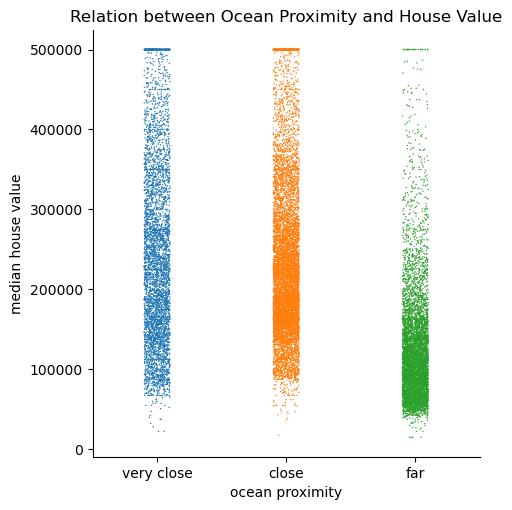

In [15]:
#Scatter plot of a relation between median house value and ocean proximity  
sns.catplot(x='ocean_proximity2', y = 'median_house_value', data = df_house, s =1)
plt.title('Relation between Ocean Proximity and House Value')
plt.xlabel('ocean proximity', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
plt.show()

I could not see the differences in house value between the blocks that are very close to the ocean house value and those that are relatively close to the ocean. However, it is clear that housing value tends to be lower when blocks are far from the ocean. Again, the location, which is ocean proximity in this case affects house value.

In [16]:
#showing the correaltion between variabels
df_house_sum.corr()

,Median Income,Population,Median House Value,Ocean Proximity
Median Income,1.000000,-0.030229,0.688075,0.184784
Population,-0.030229,1.000000,-0.033200,0.008293
Median House Value,0.688075,-0.033200,1.000000,0.436212
Ocean Proximity,0.184784,0.008293,0.436212,1.000000


There are positive correlations between income and housing value and between ocean proximity and housing value. The correlation method shows the correlation between median income and median house value is 0.688, and the correlation between ocean proximity and median house value is 0.436, both of which can be considered significant. As for population, the correlation value between population and median house value is -0.033, which is not significant since it is almost 0. 

# 2. Project Two

## 2.1 The Message

From project 1, it is obvious that there are positive correlations between median income and median house value and ocean proximity and median house value, and there is no correlation between population and median house value. Also, the income effect seems to be stronger than any other X variables I used. In order to support these findings, I will plot the relationships between ‘median house value’ and ‘income’ by subgroups 'ocean proximity’ and ‘population’. 

## 2.2 Maps and Interpretations

In [17]:
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


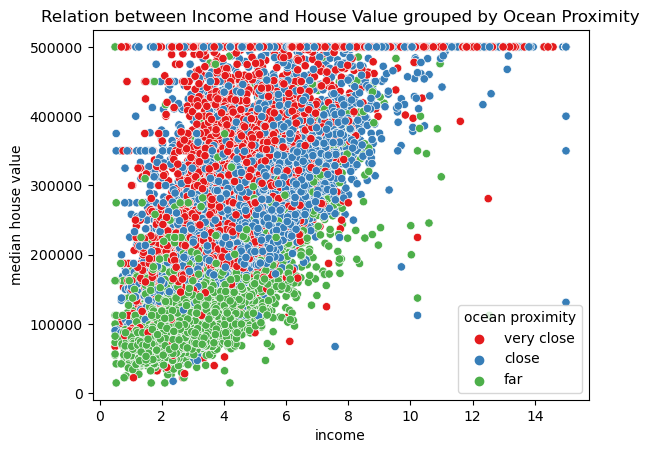

In [18]:
x = df_house['median_income']
y = df_house['median_house_value']
subgroup = df_house['ocean_proximity2']

sns.scatterplot(x, y, hue = subgroup, palette='Set1')

plt.title('Relation between Income and House Value grouped by Ocean Proximity')
plt.xlabel('income', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
legend = plt.legend()
legend.set_title('ocean proximity');

From this graph, you can not only see there is a positive correlation between income and median house value but also see that the median house value is higher when the house is close to the ocean. It also shows that people who live closer to the ocean have higher incomes. 

In order to plot a graph of the relationships between ‘median house value’ and ‘income’ by a subgroup population, I will divide the population into two groups which are higher than the median and lower than the median. 

In [19]:
median_pop = df_house['population'].median()
median_pop

1121.0

In [20]:
df_house = df_house.copy()

# create a new column in df_house called pop_HL
# classify blocks at or above the median as High
df_house.loc[df_house['population'] >= median_pop, 'pop_HL'] = 'High'
df_house.loc[df_house['population'] < median_pop, 'pop_HL'] = 'Low'

df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


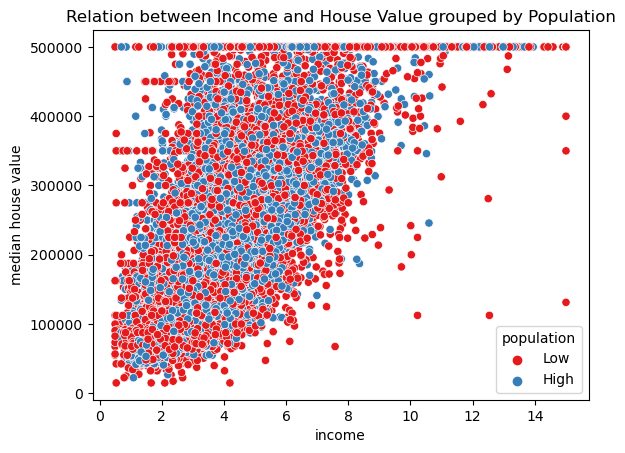

In [21]:
x = df_house['median_income']
y = df_house['median_house_value']
subgroup = df_house['pop_HL']

sns.scatterplot(x, y, hue = subgroup, palette='Set1')

plt.title('Relation between Income and House Value grouped by Population')
plt.xlabel('income', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
legend = plt.legend()
legend.set_title('population');

As you can see from the graph, there is no specific pattern that the blue and the red is distributed. Therefore, whether the population is high or low doesn’t affect the median house value. 

Of all the independent variables, I found that income is much more correlated to housing value than any other independent variable. I am going to plot a map for housing value and one for income on a county level. The purpose of making the two maps is to see if there is a similarity in the pattern between the distribution of house value and income and also to inspect the balance between household income and housing prices by for example, seeing if people that earn twice as much income spend twice as much on a house, or less than twice as much on a house. 

In [22]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds

In [23]:
#extract state information
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip") 
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [24]:
#This is county information
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip") 
CA_county = county_df.query("STATEFP == '06'") #Califormnia FIPS is 06
CA_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
33,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303..."
84,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5..."
169,06,069,00277299,0500000US06069,06069,San Benito,06,3596755292,4555000,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."
170,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7..."
200,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9..."


In [25]:
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low


In order to map the counties, we need tuples of coordinates. We generate them by zipping the latitude and longitude together to store them in a new column named coordinates. Then, we turn the tuple into a Shapely Point object. 

In [26]:
#applying Shapely’s Point method to the coordinates column
df_house["coordinates"] = list(zip(df_house.longitude, df_house.latitude)) 
df_house["coordinates"] = df_house["coordinates"].apply(Point) 
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23 37.88)
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22 37.86)
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24 37.85)
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25 37.85)
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25 37.85)


In [27]:
CA_county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

We will convert our DataFrame into a GeoDataFrame by calling the geopandas.DataFrame method. 

In [28]:
gdf_house = gpd.GeoDataFrame(df_house, crs = 4269, geometry="coordinates") 
gdf_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000)
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000)
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000)
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000)
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000)


We merge California county dataset and California Housing dataset.

In [29]:
house_county = gpd.sjoin(gdf_house, CA_county, op="within")
house_county.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931


In [30]:
house_county = house_county.drop(['index_right', 'COUNTYNS', 'AFFGEOID',
                         'LSAD', 'ALAND', 'AWATER'], axis=1)
house_county.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,STATEFP,COUNTYFP,GEOID,NAME
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),06,001,06001,Alameda
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),06,001,06001,Alameda
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),06,001,06001,Alameda
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),06,001,06001,Alameda
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),06,001,06001,Alameda


Each data is a block, so we will use group by function and calculate the mean for each variable to make this dataset county-level.

In [31]:
grouped_by_county = house_county.groupby('COUNTYFP') #group the dataframe by county 

mean_house_income = grouped_by_county['median_house_value', 'median_income', 'ocean_proximity'].mean()

mean_house_income.head()

/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_34064/2065305195.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_house_income = grouped_by_county['median_house_value', 'median_income', 'ocean_proximity'].mean()


,median_house_value,median_income,ocean_proximity
COUNTYFP,,,
001,208469.883053,3.836845,1.817641
003,118700.000000,2.613900,0.000000
005,117146.428571,3.106507,0.000000
007,89611.538462,2.335322,0.000000
009,107893.750000,2.814556,0.000000


In [32]:
#merge the dataset above with California county dataset again
house_by_county = pd.merge(mean_house_income, CA_county, on="COUNTYFP")
house_by_county.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,001,208469.883053,3.836845,1.817641,06,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,0.000000,06,01675840,0500000US06003,06003,Alpine,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,0.000000,06,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,0.000000,06,01675842,0500000US06007,06007,Butte,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,0.000000,06,01675885,0500000US06009,06009,Calaveras,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


In [33]:
house_by_county = house_by_county.drop(['COUNTYNS', 'AFFGEOID',
                           'LSAD', 'ALAND', 'AWATER'], axis=1)
house_by_county.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,NAME,geometry
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


In [34]:
# Assuming 'house_by_county' contains a column named 'geometry' with geometry information
gdf_house_by_county = gpd.GeoDataFrame(house_by_county, crs=4269, geometry='geometry')
gdf_house_by_county.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,NAME,geometry
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


Next, I am going to plot income and house value group in each county. In order to make the maps more informative, I am going to map the points of cities of Los Angeles and San Fransisco. 

In [35]:
crs = "EPSG:4326"

la_point = Point(-118.2437, 34.0522)
sf_point = Point(-122.4194, 37.7749)

data = {
    'City': ['Los Angeles', 'San Francisco'],
    'geometry': [la_point, sf_point]
}

lasf = gpd.GeoDataFrame(data, crs=crs)

In [36]:
!pip install -U mapclassify

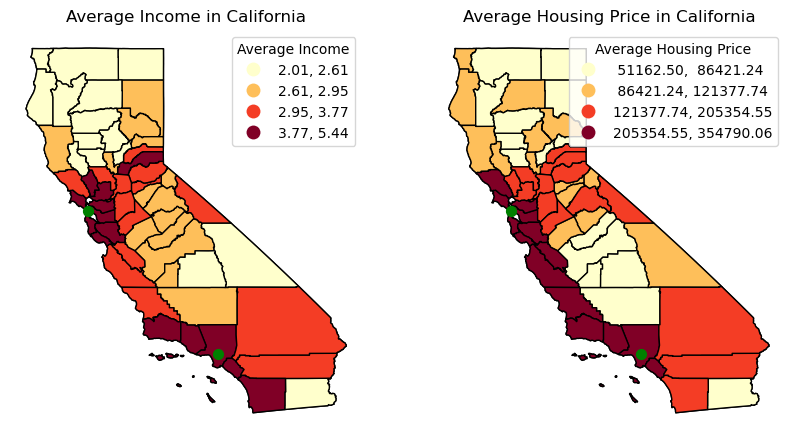

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax1 = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax1, edgecolor="black", color="white")
ax1.set_title('Average Income in California')
gdf_house_by_county.plot(
    ax=ax1, edgecolor='black', column='median_income', scheme='quantiles', 
                  k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 1, 'title': 'Average Income'})
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax1.set_axis_off()


ax2 = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax2, edgecolor="black", color="white")
ax2.set_title('Average Housing Price in California')
gdf_house_by_county.plot(
    ax=ax2, edgecolor='black', column='median_house_value', scheme='quantiles', 
                  k=4, cmap='YlOrRd', legend=True, legend_kwds={'loc': 1, 'title': 'Average Housing Price'})
lasf.plot(ax=ax2, color='green', alpha=1, marker='o', markersize=50)
ax2.set_axis_off()

plt.show()

From these maps, it is clear that average income and average housing value have a very similar pattern as average income tends to be higher in San Fransisco metropolitan area and Los Angeles metropolitan area and so does average house value. Therefore, we see the same relation between X (income) and Y (housing value) as before. Aside from that, although the tendency of the patterns in the two maps is similar, there is still a difference in how the colours were mapped. I can say that people don’t spend more on the house than they earn more.

# 3. Project Three

## 3.1 Potential Data to Scrape
Through mapping that I did on Project2, I found that there was a correlation between income and average housing prices. In addition to that, as shown in the maps, it seems like the income and housing prices tend to be higher in metropolitan areas. I assume that this happens because income and houses in counties that are the center of metropolitan areas tend to be higher because they are closer to the workplace. To see this relation, I would like to acquire data about the average commute time in each county. If the commute time in counties in the centre of metropolitan areas is longer than that in other counties, the correlation between commute time and housing prices is established, and we can add another element in relation to the location that contributed to the determination of housing prices. 

## 3.2 Potential Challenges
This data I am hoping to scrape is very simple since it shows the average commute time of each county in California, it is possible to scrape it for this project. However, the challenge that I am going to face when merging this new dataset is that since there is only county level data on commute time, I have to deal with county level dataset instead of block level data. In this case, the number of observations is much lower compared to the block dataset, and therefore it is much more difficult to do the accurate analysis. If I have a chance to work on this data in the future, I will work on all the states in the USA, or find a commute time data on block level of another state, so that I have more observations.

## 3.3 Scraping Data from a Website

I want to acquire the data of the commute time in each county in California through web scrapping from this address. 
https://www.indexmundi.com/facts/united-states/quick-facts/california/average-commute-time#table

In terms of convenience, I assume the counties where the commute is longer has lower house value on average.


First, I am going to request the URL by using requests.get method. Then, I will check the status codes of the response that I received from the webserver and relevant content of the webpage in the obtained response. This content received is the HTML source code of the webpage.

In [38]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

commute_web_url = "https://www.indexmundi.com/facts/united-states/quick-facts/california/average-commute-time#table"
response = requests.get(commute_web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:2000])

Status code
 200

--

Content of the website
 b'\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n<head><title>\r\n\tCalifornia Average Commute Time by County\r\n</title><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="viewport" content="width=device-width, initial-scale=1" />\r\n    <meta name="Description" content="Map, bar chart, and table showing Mean travel time to work (minutes), workers age 16 years+, 2014-2018 by county. The source of the data is the US Census Bureau." />\r\n    <link href="../../../Content/TaxViewer.css" rel="stylesheet" type="text/css" />\r\n    <style type="text/css">\r\n        h1 {margin:0 0 0.25em 0}\r\n        #breadcrumb {margin:0 0 0.75em 0}\r\n        .data-table tr:nth-child(even) { background-color:#eee; }\r\n    </style>\r\n    <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.3/jquery.min.js" type="text/javascript"></script>\r\n\r\n    <!-- Start AdMetricsPro Header Code for indexmundi.com -->\r\n    <script async src="http

The response has a status code of 200, which means this is a successful response. Next, I will use a Python library bs4 which parses through HTML content and understands the complete structure of the content. I will pass the response content to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [39]:
soup_object = BeautifulSoup(response.content)

soup_object

<!DOCTYPE html>
<html lang="en">
<head><title>
	California Average Commute Time by County
</title><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Map, bar chart, and table showing Mean travel time to work (minutes), workers age 16 years+, 2014-2018 by county. The source of the data is the US Census Bureau." name="Description"/>
<link href="../../../Content/TaxViewer.css" rel="stylesheet" type="text/css"/>
<style type="text/css">
        h1 {margin:0 0 0.25em 0}
        #breadcrumb {margin:0 0 0.75em 0}
        .data-table tr:nth-child(even) { background-color:#eee; }
    </style>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.3/jquery.min.js" type="text/javascript"></script>
<!-- Start AdMetricsPro Header Code for indexmundi.com -->
<script async="" src="https://qd.admetricspro.com/js/indexmundi/layout-loader.js"></script>
<!-- End  AdMetricsPro Header Code for indexmundi.com  -->

I just explored the schema and understand the structure of the webpage by inspecting the webpage directly on a web browser. In detail, I opened a console window which shows the real time HTML code corresponding to the web content on the website, and identified the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In this case, the data is enclosed in the <div> HTML tag with the class name 'tab_content'. This information can be used to search for the web content directly in our soup object with the find_all() method. This will return a soup object.

In [40]:
data_table = soup_object.find_all('div', 'tab_content')[2]
data_table

<div class="tab_content" id="tableTab">
<table>
<caption>Mean travel time to work (minutes), workers age 16 years+, 2014-2018 - (Minutes)</caption>
<thead>
<tr>
<th>County</th>
<th>Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>Alameda</td>
<td align="right">33.4</td>
</tr>
<tr>
<td>Alpine</td>
<td align="right">21.6</td>
</tr>
<tr>
<td>Amador</td>
<td align="right">31.6</td>
</tr>
<tr>
<td>Butte</td>
<td align="right">21.0</td>
</tr>
<tr>
<td>Calaveras</td>
<td align="right">37.9</td>
</tr>
<tr>
<td>Colusa</td>
<td align="right">25.1</td>
</tr>
<tr>
<td>Contra Costa</td>
<td align="right">38.0</td>
</tr>
<tr>
<td>Del Norte</td>
<td align="right">14.6</td>
</tr>
<tr>
<td>El Dorado</td>
<td align="right">29.3</td>
</tr>
<tr>
<td>Fresno</td>
<td align="right">22.6</td>
</tr>
<tr>
<td>Glenn</td>
<td align="right">21.8</td>
</tr>
<tr>
<td>Humboldt</td>
<td align="right">18.1</td>
</tr>
<tr>
<td>Imperial</td>
<td align="right">22.0</td>
</tr>
<tr>
<td>Inyo</td>
<td align="right">16.3</td>
</tr>

It can be seen that relevant block of data has been extracted but further extraction needs to be done to individually extract the name of the county, the commute time in each county. On further analysis, it can be seen that every row of data is enclosed under a <tr> HTML tag which means table row. All these row values can be extracted into a list of values by finding the <tr> values from our newly created soup object data_table.

In [41]:
all_values = data_table.find_all('tr')
all_values[:3]

[<tr>
 <th>County</th>
 <th>Value</th>
 </tr>,
 <tr>
 <td>Alameda</td>
 <td align="right">33.4</td>
 </tr>,
 <tr>
 <td>Alpine</td>
 <td align="right">21.6</td>
 </tr>]

The first element of the list contains the column names 'County, and Value'. The next elements of the list contain soup objects which contain the county data including the name of each county and the commute time. This data can be extracted in a loop since the structure for all the list elements is the same. Now, I am going to make a data frame based on the information I get from web scraping. 

-	An empty dataframe commute_df is created with the column names county and time. 
-	The index is initiated to zero
-	A for loop is designed to go through all the elements of the list in order and extract the county and time from the list element which are enclosed in the <td> HTML tag. A find_all() will return a list of td tags.
-	The .text attribute can be used to just pick the text part from the tag. In our case this is the county and time. 
-	These values are then put into the data frame and the index value is incremented


In [42]:
commute_df = pd.DataFrame(columns = ['name', 'time']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text
    time = values[1].text
    
    commute_df.loc[ix] = [name, time]# Store it in the dataframe as a row
    ix += 1
    
commute_df = commute_df.replace(r'\n','',regex =True)

# Print the first 5 rows of the dataframe
commute_df.head()

,name,time
0,Alameda,33.4
1,Alpine,21.6
2,Amador,31.6
3,Butte,21.0
4,Calaveras,37.9


I will merge this new dataset with the existing county-level dataset. 

In [43]:
# rename the column 'Name' to 'name 
colnames = {'NAME': 'name'}
gdf_house_by_county = gdf_house_by_county.rename(columns=colnames)
gdf_house_by_county.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


In [44]:
# merge the two datasets
house_commute =  pd.merge(gdf_house_by_county, commute_df, on = 'name')
house_commute ['time'] = house_commute ['time'].astype(float) #convert the value of 'time' into number 
house_commute.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry,time
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",21.6
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",31.6
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",21.0
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",37.9


In [45]:
len(house_commute)

58

My county-level dataset has 58 observations and after merging, it is still 58, since California has 58 counties. 

## 3.5 Visualizing the Scraped Dataset

Now, I am going to see if there really is a negative correlation between commute time and housing value. First, I am going to make a scatter plot to see the relationship between commute time and housing value. 

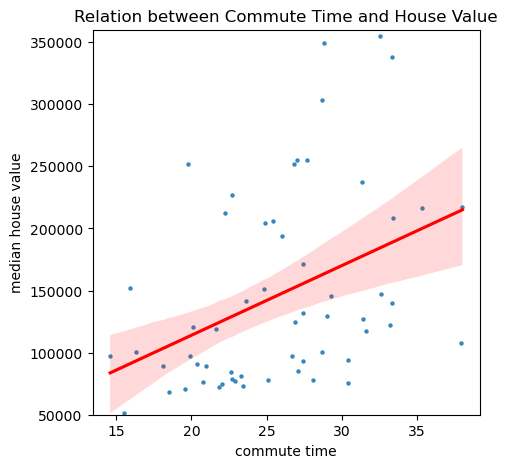

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax = ax
sns.regplot(x=house_commute["time"], y=house_commute["median_house_value"], scatter_kws={"s": 5}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Commute Time and House Value')
ax.set_ylim(50000, 360000)
ax.set_xlabel('commute time', fontsize = 10)
ax.set_ylabel('median house value', fontsize = 10);


This graph suggests there is a positive correlation between commute time and housing value, which is the opposite of what I expected. Next, I am going to create two maps, one is for commute time in each county in California, and the other is for house value, to see if there is a similarity or difference in pattern.

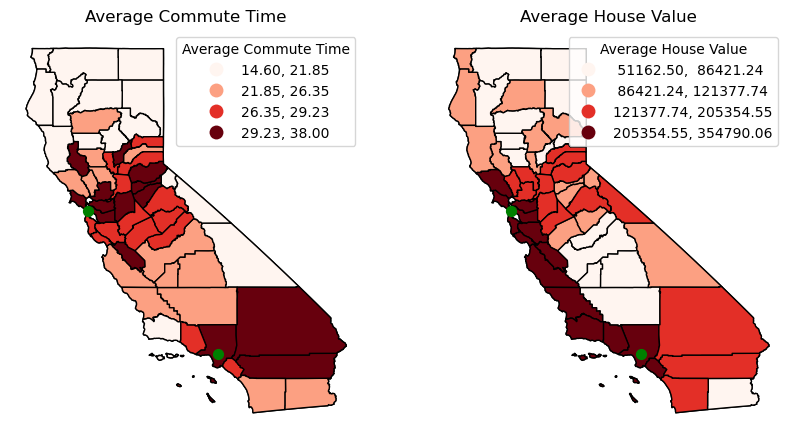

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax1 = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax1, edgecolor="black", color="white")
ax1.set_title('Average Commute Time')
house_commute.plot(
    ax=ax1, edgecolor='black', column='time', legend=True, scheme='quantiles', 
                  k=4, cmap='Reds', legend_kwds={'loc': 1, 'title': 'Average Commute Time'})
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax1.set_axis_off()


ax2 = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax2, edgecolor="black", color="white")
ax2.set_title('Average House Value')
house_commute.plot(
    ax=ax2, edgecolor='black', column='median_house_value', legend=True, scheme='quantiles', 
                  k=4, cmap='Reds', legend_kwds={'loc': 1, 'title': 'Average House Value'})
lasf.plot(ax=ax2, color='green', alpha=1, marker='o', markersize=50)
ax2.set_axis_off()

plt.show()

When looking at the map of average commute time, it is clear that counties around San Fransisco metropolitan area and Los Angeles metropolitan area. It is quite surprising that the commuting time is still long in counties that are at the centre of metropolitan areas. when comparing this with the map of average housing prices, the similarity is that the commute time is high and the house value is high in the centre of the metropolitan areas. The difference is that though the average house value gets lower outside of the centre of the metropolitan areas, the average commute time is very high outside of them. Overall, however, it seems that in coutnies with higher average commute time, the average house value is also higher.

## 3.6 Adding a New Dataset

After analyzing the relationship between commute time and house value, it was understood that the correlation between commute time and house value is not significant. However, since income and housing prices are higher in large cities, I still assume that there is some relationship between house value and urban areas. In order to dig into that, I would like to classify each county depending on the urban-rural classification, and the degree of urbanism in each county has an influence on its house value. 

The data I am going to use is the dataset of rural classifications in California from Economic Research Service in U.S. Department of Agriculture. 

In [48]:
#read the excel file
urban_rural = pd.read_excel('code93.xls')
urban_rural.head()

,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
0,1001,AL,AUTAUGA COUNTY,2
1,1003,AL,BALDWIN COUNTY,2
2,1005,AL,BARBOUR COUNTY,6
3,1007,AL,BIBB COUNTY,6
4,1009,AL,BLOUNT COUNTY,2


In [49]:
#remove data from other states
urban_rural = urban_rural[urban_rural["State"] == " CA"]
urban_rural.head()

,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
183,6001,CA,ALAMEDA COUNTY,0
184,6003,CA,ALPINE COUNTY,9
185,6005,CA,AMADOR COUNTY,6
186,6007,CA,BUTTE COUNTY,3
187,6009,CA,CALAVERAS COUNTY,6


In [50]:
urban_rural['County Name'] = urban_rural['County Name'].str.replace('COUNTY\s', '')
urban_rural['County Name'] = urban_rural['County Name'].str.replace('\s+', '')
urban_rural['County Name'] = urban_rural['County Name'].str.title()
urban_rural['FIPS Code'] = urban_rural['FIPS Code'].astype(str).str[1:]
urban_rural.head()

/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_34064/476676779.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  urban_rural['County Name'] = urban_rural['County Name'].str.replace('COUNTY\s', '')
/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_34064/476676779.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  urban_rural['County Name'] = urban_rural['County Name'].str.replace('\s+', '')


,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
183,001,CA,Alameda,0
184,003,CA,Alpine,9
185,005,CA,Amador,6
186,007,CA,Butte,3
187,009,CA,Calaveras,6


In [51]:
#rename some columns for the merge 
new_name = {'FIPS Code': 'COUNTYFP',
           'Rural-urban Continuuum Code, 1993': 'Rural_Urban'}

urban_rural = urban_rural.rename(columns = new_name)
urban_rural.head()

,COUNTYFP,State,County Name,Rural_Urban
183,001,CA,Alameda,0
184,003,CA,Alpine,9
185,005,CA,Amador,6
186,007,CA,Butte,3
187,009,CA,Calaveras,6


Now that I finished the new dataset, I am going to merge it with the county-level dataset. 

In [52]:
houcom_urbru =  pd.merge(house_commute, urban_rural, on = 'COUNTYFP')
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry,time,State,County Name,Rural_Urban
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",21.6,CA,Alpine,9
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",31.6,CA,Amador,6
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",21.0,CA,Butte,3
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",37.9,CA,Calaveras,6


As for classification, the number 0 to 3 means the counties are metro areas, and 4 to 9 mean they are non-metro areas. Within two groups, the higher the number is the more urban the county is. 

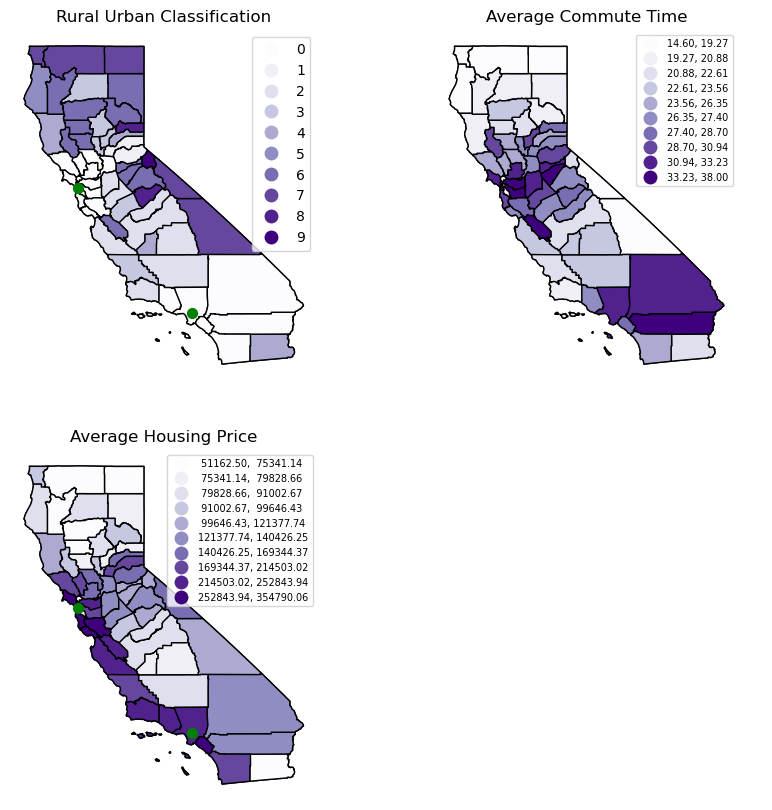

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes[0,0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Rural Urban Classification')
houcom_urbru['Rural_Urban'] = houcom_urbru['Rural_Urban'].astype('category').cat.codes
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='Rural_Urban', legend=True, cmap='Purples', 
    categorical=True)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_axis_off()


ax = axes[0,1]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Average Commute Time')
house_commute.plot(
    ax=ax, edgecolor='black', column='time', legend=True, scheme='quantiles', 
                  k=10, cmap='Purples', legend_kwds={'loc': 1, 'fontsize': 7})
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax.set_axis_off()

ax = axes[1,0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Average Housing Price')
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='median_house_value', scheme='quantiles', 
                  k=10, cmap='Purples', legend=True, legend_kwds={'loc': 1, 'fontsize': 7})
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_axis_off()

ax = axes[1,1]
ax.set_axis_off()


plt.show()

The result is very similar to when we compared the pattern of commute time and average housing price. Again, the difference is that though the average house value gets lower outside of the centre of the metropolitan areas, the counties that are classified as most urban cover wider places areas that could cover up the whole metropolitan areas. It is expected that most urban areas are the places in the metropolitan areas where people commute to large cites, and therefore the commute time in the commute time is long in such areas, whereas people in rural areas don’t commute to cities and therefore don’t take a long time for the commute. And despite that, it doesn’t have much influence on house prices. 

Although I couldn’t see a clear correlation between urban-rural classification and house value, I decided to make broader subgroups to see the relationship more, since there is still a potential it is correlated. Although I couldn’t see a clear correlation between urban-rural classification and house value, I decided to make broader subgroups to see the relationship more, since there is still a potential it is correlated. I made new columns that show if the county is in a metro area or not and if the average house value in the county is higher than the median or not. 

In [54]:
median_i = houcom_urbru['median_house_value'].median()
houcom_urbru.loc[houcom_urbru['median_house_value'] >= median_i, 'house_HL'] = 'High'
houcom_urbru.loc[houcom_urbru['median_house_value'] < median_i, 'house_HL'] = 'Low'
houcom_urbru.loc[houcom_urbru['Rural_Urban'] <= 3, 'Metro'] = 'Metro'
houcom_urbru.loc[houcom_urbru['Rural_Urban'] > 3, 'Metro'] = 'NonMetro'
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry,time,State,County Name,Rural_Urban,house_HL,Metro
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",21.6,CA,Alpine,9,Low,NonMetro
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",31.6,CA,Amador,6,Low,NonMetro
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",21.0,CA,Butte,3,Low,Metro
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",37.9,CA,Calaveras,6,Low,NonMetro


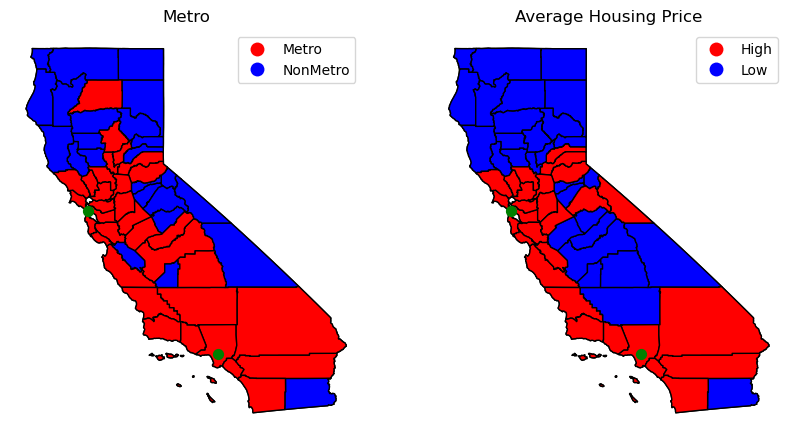

In [55]:
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
cmap = ListedColormap(['red', 'blue'])
houcom_urbru.plot(ax=ax, edgecolor='black', column='Metro', legend=True, cmap=cmap)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_title('Metro')
ax.set_axis_off()


ax = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
cmap = ListedColormap(['red', 'blue'])
ax.set_title('Average Housing Price')
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='house_HL', legend=True, cmap=cmap)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_axis_off()

plt.show()

Comparing these two maps, it is clear that the colour pattern of the two is similar to each other. From this fact, it can be said that the housing price is affected by whether the place is within a metropolitan area or not. 

# Final Project

Through project 1 and project 2, I found that there are significant positive correlations between income and house value and between ocean proximity and house value. I did not see a correlation between population and house value. In project 3, I focused on how house value is different in different places in relation to metropolitan areas and used commute time and urban-rural classification as indicators to see it. I found there was a potential correlation between metro areas and house value and house value, whereas the relationship between house value and commute time was not clear. In this final project, I will conduct an OLS regression analysis and Machine learning to see the relationships between housing prices and these indicators.

## 4.1 OLS Regression

In this OLS regression, I decided my independent variables are median income, ocean proximity and population, commute time and rural-urban classification (metro or non-metro). My dependent variable is housing value. 

I think these Xs should be in the regressions I will conduct because they appeared to be related to Y through scatter plots or GIS mapping. Even though I didn’t get the results I expected between house value and population and between house value commute time, there is still a chance that they somehow affect house value. 

I assume that the economic relationships between my Y and Xs are linear. For median income, ocean proximity, population and population, I created a scatter plot showing the relationship between each of the variables and house value. The plots show that there might be linear relationships. For rural classification (metro or non-metro) the spatial pattern is very similar to one of average housing price, and therefore the relationship between those two is linear.

Before getting into running regressions, I would make a new binary variable for ocean proximity, which shows 1 if it is close or very close to the ocean, and 0 if it is far from the ocean. This is because, in previous projects, it was found that the difference in house value between ‘very close’ and ‘close’ was not significant, so I would like to make a simpler variable for the regression. 

In [56]:
gdf_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000)
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000)
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000)
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000)
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000)


In [57]:
gdf_house.loc[(gdf_house['ocean_proximity'] == 2) | (gdf_house['ocean_proximity'] == 1), 'ocean_proximity3'] = 1
gdf_house.loc[gdf_house['ocean_proximity'] == 0, 'ocean_proximity3'] = 0
gdf_house['ocean_proximity3'] = gdf_house['ocean_proximity3'].astype(int)
gdf_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,ocean_proximity3
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1


In [58]:
gdf_house['log_' + 'median_income'] = np.log(gdf_house['median_income'])
gdf_house['log_' + 'median_house_value'] = np.log(gdf_house['median_house_value'])
gdf_house['log_' + 'population'] = np.log(gdf_house['population'])
gdf_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,ocean_proximity3,log_median_income,log_median_house_value,log_population
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1,2.119287,13.022764,5.774552
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1,2.116424,12.789684,7.783641
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1,1.982022,12.771671,6.206576
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1,1.730434,12.740517,6.324359
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1,1.347086,12.743151,6.336826


I am going to run four regressions. 

The first one includes income, ocean proximity as Xs and median house value as Y. This is because these Xs are the variables that were already on the dataset provided, and it seems very clear they affect house value. This will be the simplest, therefore, default linear regression I will conduct in this project. In the second one, I will add population as one of the Xs. Since it was difficult to see the effect of population on house value, I will be able to see if there is a relationship between the population and house value through regression and see whether and how it is more accurate than the first regression. 

In [59]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [60]:
! pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [61]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [62]:
gdf_house['const'] = 1
X1 = ['const', 'log_median_income', 'ocean_proximity3']
X2 = ['const', 'log_median_income', 'ocean_proximity3', 'log_population']

reg1 = sm.OLS(gdf_house['log_median_house_value'], gdf_house[X1], missing='drop').fit()
reg2 = sm.OLS(gdf_house['log_median_house_value'], gdf_house[X2], missing='drop').fit()

In [63]:
stargazer = Stargazer([reg1, reg2])

HTML(stargazer.render_html())

The R-squared statistic, also known as the coefficient of determination, is a measure of the goodness of fit of the regression model. In our analysis, the R-squared values of both two regressions were calculated to be 0.624, indicating that approximately 62.4% of the variation in the dependent variable can be explained by the independent variables included in the models. This suggests that the regression models explain a moderate proportion of the total variation in the dependent variable, with the remaining variation likely attributable to other factors not included in the model. Also, the p-value of the coefficients of all the variables is less than 0.01, indicating that they are statistically significant at a 99% confidence level.

The F-statistic is a measure of the overall significance of the regression model, evaluating whether the relationship between the dependent variable and the independent variables is statistically significant. In our analysis, the calculated F-statistic value of each regression model was 17131.922 and 10902.455, with a p-value of less than 0.01, indicating that both regression models are statistically significant at a 99% confidence level. This suggests that the observed relationship between the variables in the models is unlikely to be due to random chance alone, as the p-value is below the chosen significance level. Therefore, we can reject the null hypothesis of no relationship between the variables and conclude that the regression models as a whole are statistically significant.

Comparing the two regression models, the first regression model has a higher F-statistic value of 14423.162 compared to the second regression model with an F-statistic value of 9076.909. In general, a higher F-statistic value indicates a better fit of the regression model to the data, suggesting that the first regression model may be a better fit than the second regression model. Also, the coefficient of each independent variable hasn’t changed a lot, and the coefficient of the new variable of ‘population’ is much less significant than other variables. Additionally, it's worth noting that the R-squared value for both regression models is the same. This suggests that both models explain the same proportion of the total variation in the dependent variable, which may indicate that the additional inclusion of the population variable in the second regression model does not significantly improve the model's explanatory power.

From the R squared value of the previous regression models, there is a high possibility that there are other factors that explain Y. Since I found that the population variable doesn’t improve the regression model, the third one includes only income and ocean proximity, and I decided to add commute time to it. Commute time might be an important independent variable because it is one of the indicators of the convenience of the place and because we found a possible relationship through a scatter plot. The rural-urban classification variable will be added in the fourth regression model.  Aside from commute time, whether the place is in a metropolitan area or not can affect housing prices, and also, the spatial pattern of metro areas and housing value appeared to be similar in the previous projects, so it is reasonable to add the Metro dummy variable in the fourth regression. 

In [64]:
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry,time,State,County Name,Rural_Urban,house_HL,Metro
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",21.6,CA,Alpine,9,Low,NonMetro
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",31.6,CA,Amador,6,Low,NonMetro
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",21.0,CA,Butte,3,Low,Metro
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",37.9,CA,Calaveras,6,Low,NonMetro


I would make a new binary variable for the Metro value, which shows 1 if the block is in a metro area, and 0 if it is not. 

In [65]:
houcom_urbru.loc[houcom_urbru['Metro'] == 'Metro', 'Metro2'] = '1'
houcom_urbru.loc[houcom_urbru['Metro'] == 'NonMetro', 'Metro2'] = '0'
houcom_urbru['Metro2'] = houcom_urbru['Metro2'].astype(int)
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,ocean_proximity,STATEFP,GEOID,name,geometry,time,State,County Name,Rural_Urban,house_HL,Metro,Metro2
0,001,208469.883053,3.836845,1.817641,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1
1,003,118700.000000,2.613900,0.000000,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",21.6,CA,Alpine,9,Low,NonMetro,0
2,005,117146.428571,3.106507,0.000000,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",31.6,CA,Amador,6,Low,NonMetro,0
3,007,89611.538462,2.335322,0.000000,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",21.0,CA,Butte,3,Low,Metro,1
4,009,107893.750000,2.814556,0.000000,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",37.9,CA,Calaveras,6,Low,NonMetro,0


In [66]:
house_county2 = gpd.sjoin(gdf_house, CA_county, op="within")
house_county2.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,ocean_proximity3,...,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1,...,2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1,...,2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1,...,2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931


I am going to merge the block-level data and the county-level data for regression because the data for commute time and urban classification was only available for county-level data. 

In [67]:
df_reg = pd.merge(house_county2, houcom_urbru, on="COUNTYFP")
df_reg.head()

,longitude,latitude,population,median_income_x,median_house_value_x,ocean_proximity_x,ocean_proximity2,pop_HL,coordinates,ocean_proximity3,...,GEOID_y,name,geometry,time,State,County Name,Rural_Urban,house_HL,Metro,Metro2
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1,...,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1,...,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1,...,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",33.4,CA,Alameda,0,High,Metro,1


In [68]:
df_reg['log_' + 'median_income_x'] = np.log(df_reg['median_income_x'])
df_reg['log_' + 'median_house_value_x'] = np.log(df_reg['median_house_value_x'])
df_reg['log_' + 'time'] = np.log(df_reg['time'])
df_reg.head()

,longitude,latitude,population,median_income_x,median_house_value_x,ocean_proximity_x,ocean_proximity2,pop_HL,coordinates,ocean_proximity3,...,time,State,County Name,Rural_Urban,house_HL,Metro,Metro2,log_median_income_x,log_median_house_value_x,log_time
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1,...,33.4,CA,Alameda,0,High,Metro,1,2.119287,13.022764,3.508556
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1,...,33.4,CA,Alameda,0,High,Metro,1,2.116424,12.789684,3.508556
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.982022,12.771671,3.508556
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.730434,12.740517,3.508556
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.347086,12.743151,3.508556


In [69]:
df_reg['const'] = 1
X3 = ['const', 'log_median_income_x', 'ocean_proximity3', 'log_time']
X4 = ['const', 'log_median_income_x', 'ocean_proximity3', 'log_time', 'Metro2']

In [70]:
reg3 = sm.OLS(df_reg['log_median_house_value_x'], df_reg[X3], missing='drop').fit()
reg4 = sm.OLS(df_reg['log_median_house_value_x'], df_reg[X4], missing='drop').fit()
stargazer2 = Stargazer([reg3, reg4])
HTML(stargazer2.render_html())

Comparing the two regression models, the first regression model has a higher F-statistic value of 12374.281 compared to the second regression model with an F-statistic value of 9318.428 which suggests that the first regression model may be a better fit than the second regression model. Also, the coefficient of each independent variable hasn’t changed a lot, and the coefficient of the new variable of ‘Metro2’ is much less significant than other variables. Additionally, it's worth noting that the R-squared value for both regression models is almost the same. This suggests that both models explain the same proportion of the total variation in the dependent variable, which may indicate that the additional inclusion of the population variable in the second regression model does not significantly improve the model's explanatory power.

 In our analysis, the R-squared value was calculated to be 0.645 and 0.646 respectively, indicating that approximately 64.5% and 64.6% of the variation in the dependent variable can be explained by the independent variables included in the model. This suggests that the regression model explains a substantial proportion of the total variation in the dependent variable, with the remaining variation likely attributable to other factors not included in the model." Also, the p-value of the coefficients of all the variables is less than 0.01, indicating that they are statistically significant at a 99% confidence level.

In our analysis, the calculated F-statistic values for the new regression models were 12374.281 and 9318.428, respectively, with p-values less than 0.01. This indicates that both regression models are statistically significant at a 99% confidence level. The low p-values suggest that the observed relationship between the variables in the models is unlikely to be due to random chance alone, providing evidence to reject the null hypothesis of no relationship between the variables. Therefore, we can conclude that the regression models as a whole are statistically significant based on the calculated F-statistic values and their associated p-values.

Comparing the two regression models, the first regression model has a higher F-statistic value of 12374.281 compared to the second regression model with an F-statistic value of 9318.428 which suggests that the first regression model may be a better fit than the second regression model. Also, the coefficient of each independent variable hasn’t changed a lot, and the coefficient of the new variable of ‘Metro2’ is much less significant than other variables. Additionally, it's worth noting that the R-squared value for both regression models is almost the same. This suggests that both models explain the same proportion of the total variation in the dependent variable, which may indicate that the additional inclusion of the population variable in the second regression model does not significantly improve the model's explanatory power.

## 4.2 Machine Learning

Next, I will use Machine Learning to do further analysis. I will use the log of income and ocean proximity as Xs, and the log of the house value as Y. This is because when I add the log of commute time, the feature importance of it became 1.0 and other variables weren’t taken into consideration, so I removed it. 

The objective function for a regression tree is below:$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

In [71]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection)
from sklearn import tree

In [72]:
df_reg.head()

,longitude,latitude,population,median_income_x,median_house_value_x,ocean_proximity_x,ocean_proximity2,pop_HL,coordinates,ocean_proximity3,...,time,State,County Name,Rural_Urban,house_HL,Metro,Metro2,log_median_income_x,log_median_house_value_x,log_time
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),1,...,33.4,CA,Alameda,0,High,Metro,1,2.119287,13.022764,3.508556
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),1,...,33.4,CA,Alameda,0,High,Metro,1,2.116424,12.789684,3.508556
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.982022,12.771671,3.508556
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.730434,12.740517,3.508556
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),1,...,33.4,CA,Alameda,0,High,Metro,1,1.347086,12.743151,3.508556


In [73]:
important = ['log_median_income_x', 'ocean_proximity3']
X = df_reg[important]
df_reg["log_median_house_value_x"] = y

if X.shape[0] != y.shape[0]:
    # Fix the mismatch by aligning the number of samples in X and y
    if X.shape[0] > y.shape[0]:
        X = X.iloc[:y.shape[0], :]
    else:
        y = y.iloc[:X.shape[0]]

    print("Fixed shapes: X={}, y={}".format(X.shape, y.shape))

Fixed shapes: X=(20412, 2), y=(20412,)


In [74]:
house_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

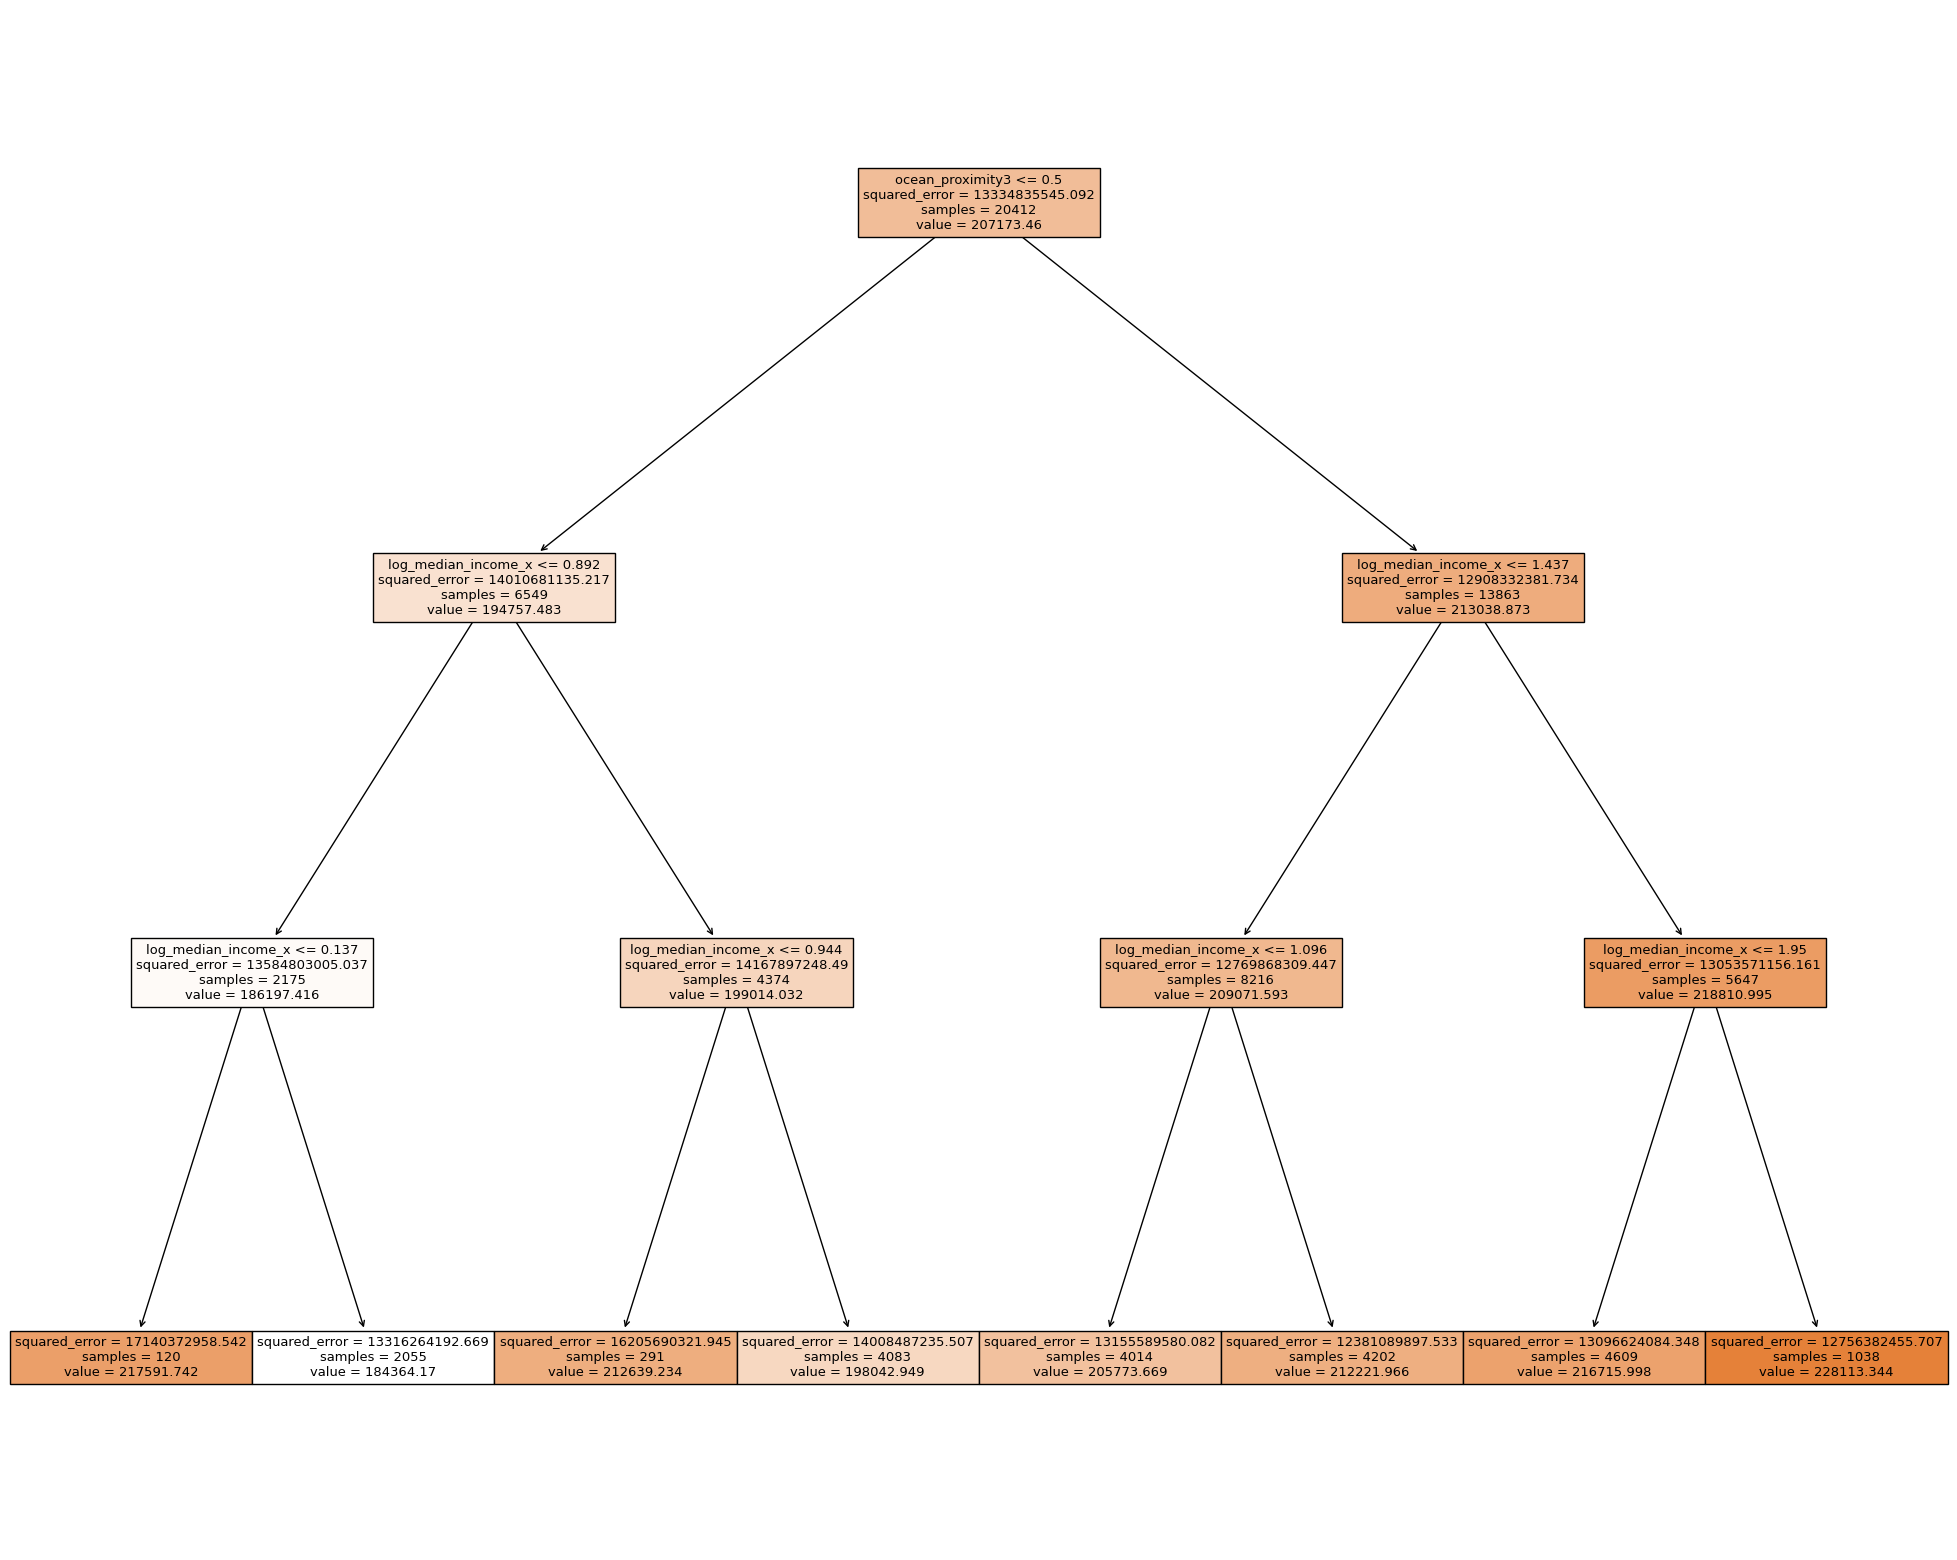

In [75]:
house_fig = plt.figure(figsize=(25,20))
house_fig = tree.plot_tree(house_tree, feature_names=X.columns, filled=True)

In [76]:
y_pred_tree = house_tree.predict(X)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 13216226663.476631


You can see that mean squared error (mse) of a tree with depth of 3 is extremely high. Also the MSE of the regression tree is very high overall. 

Next, I will also use Random Forest.

In [77]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
regr2 = RandomForestRegressor(max_features=2, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)

5355876917.286686

As you can see, mean squared error (mse) got lower.

## Conclusion

In conclusion, this study has examined the determinants of housing prices using a comprehensive econometric analysis. Through my empirical research, I have found strong evidence to support my thesis that income, ocean proximity, and commute time play a significant role in influencing housing values. Specifically, regression analysis and machine learning have revealed that income, ocean proximity, and commute time have a positive effect on housing prices. However, the population does not seem to have a significant impact, and the impact of urban-rural classification remains unclear as the coefficient in the regressions was not economically significant. One notable contribution of this paper is its focus on location and spatial patterns in addition to simple factors such as income and population.

The findings of this study highlight how housing prices are affected in the state of California. However, it is important to acknowledge the limitations of this research. For instance, the results may differ when using county-level data compared to block-level data. For example, the commute time in counties located in the center of metropolitan areas may be long, and therefore a negative correlation between commute time and house prices may not be apparent. Conducting the analysis at a block level would allow for a more accurate assessment of relationships within counties with more observations. Additionally, the use of machine learning in this study was complicated, resulting in a high mean squared error, which may limit the conclusiveness of the findings based on this approach.

Future research could benefit from using more block-level data, if available, to conduct more precise analyses. Additionally, exploring the role of other factors, such as demographic changes or the prevalence of public transportation, could provide further insights into the dynamics of the housing market. Nevertheless, this study contributes to the existing literature by providing empirical evidence and insights that can guide future research in this area.